In [3]:
# Параметри навчання
EPOCHS = 20
INPUT_NEURONS = 128
HIDDEN_NEURONS = 128
OUTPUT_NEURONS = 10
NOISY_IMAGES = 7
NOISY_LEVELS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Різні рівні шуму

Epoch 1/20


c:\Users\sviat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8682 - loss: 0.4616 - val_accuracy: 0.9615 - val_loss: 0.1259
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9669 - loss: 0.1099 - val_accuracy: 0.9660 - val_loss: 0.1106
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9778 - loss: 0.0734 - val_accuracy: 0.9705 - val_loss: 0.0932
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9833 - loss: 0.0508 - val_accuracy: 0.9731 - val_loss: 0.0932
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9877 - loss: 0.0375 - val_accuracy: 0.9730 - val_loss: 0.0888
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9911 - loss: 0.0281 - val_accuracy: 0.9740 - val_loss: 0.0894
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9723 - val_loss: 0.0997
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9932 - loss: 0.0183 - val_accurac

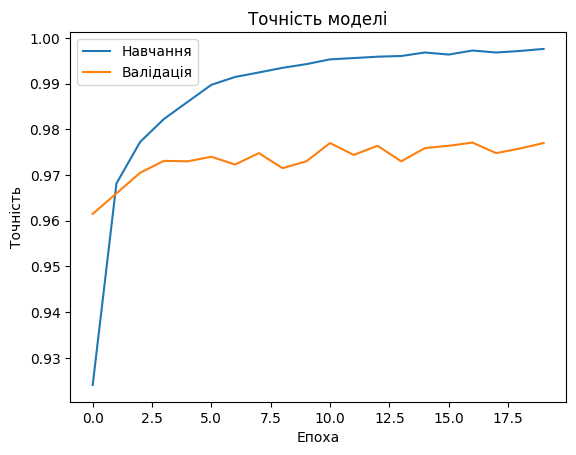

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Завантаження датасету MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормалізація даних
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Створення моделі нейронної мережі
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=INPUT_NEURONS, activation='relu'),
    tf.keras.layers.Dense(units=HIDDEN_NEURONS, activation='relu'),
    tf.keras.layers.Dense(units=OUTPUT_NEURONS, activation='softmax')
])

# Компиляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

# Оцінка моделі
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Втрата валідації: {val_loss}")
print(f"Точність валідації: {val_acc}")

# Графік точності навчання та валідації
plt.plot(history.history['accuracy'], label='Навчання')
plt.plot(history.history['val_accuracy'], label='Валідація')
plt.title('Точність моделі')
plt.ylabel('Точність')
plt.xlabel('Епоха')
plt.legend()
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step


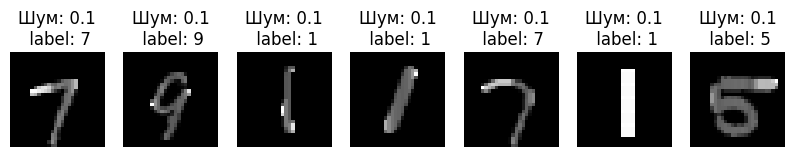

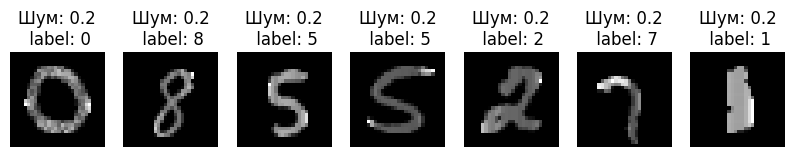

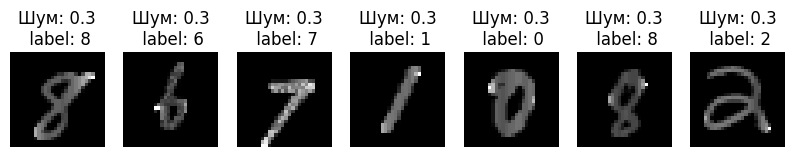

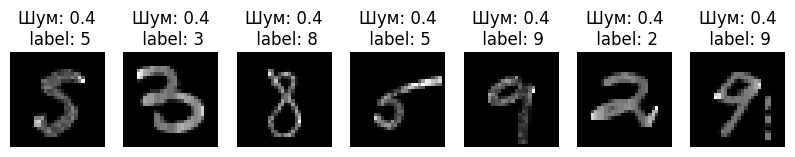

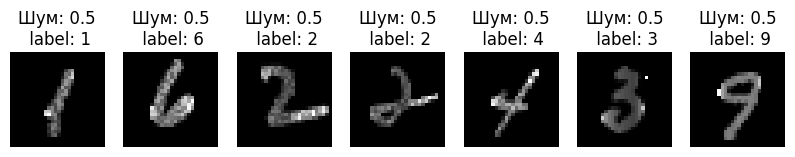

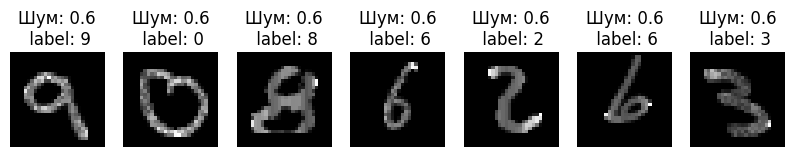

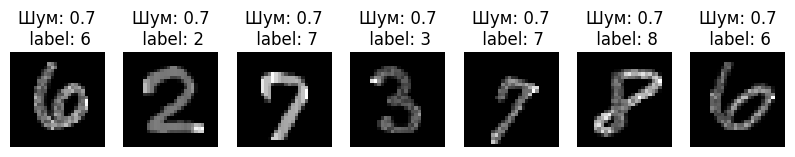

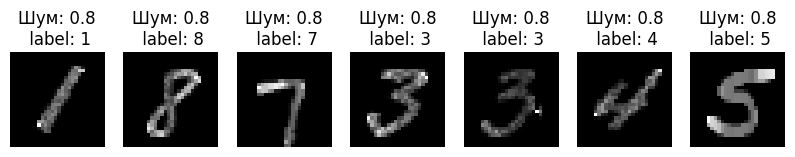

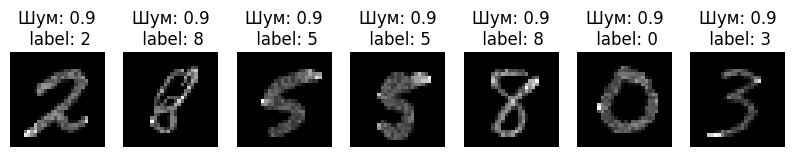

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


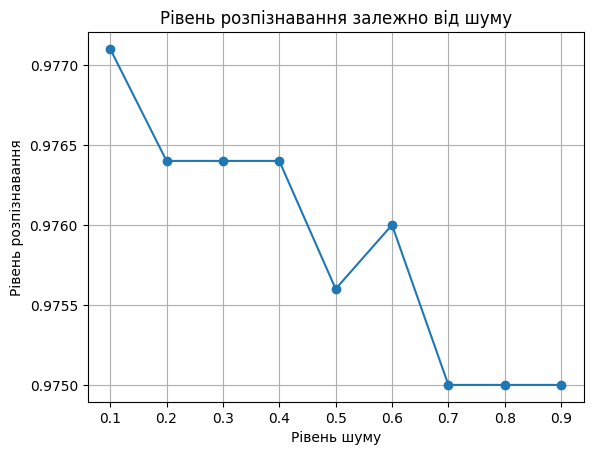

In [4]:
# Функція для додавання шуму до зображень
def add_noise(images, noise_level):
    noisy_images = np.copy(images)
    for i in range(len(images)):
        if np.random.rand() < noise_level:
            noise = np.random.rand(28, 28) * 0.5  # Додавання випадкового шуму
            noisy_images[i] = noisy_images[i] * (1 - noise)  # Застосування шуму
    return noisy_images

# Генерація зашумлених зображень та зберігання результатів
results = {level: [] for level in NOISY_LEVELS}

for noise in NOISY_LEVELS:
    noisy_X_train = add_noise(X_train, noise)

    # Розпізнавання зашумлених зображень
    predictions = model.predict(noisy_X_train)
    predicted_labels = np.argmax(predictions, axis=1)

    # Додавання результатів
    random_indices = np.random.choice(len(noisy_X_train), NOISY_IMAGES, replace=False)  # Вибір випадкових індексів
    for i in random_indices:
        results[noise].append((noisy_X_train[i], predicted_labels[i]))

# Відображення результатів зашумлених зображень у спільних графіках
for noise, images in results.items():
    plt.figure(figsize=(10, 2))
    for i, (img, label) in enumerate(images):
        plt.subplot(1, NOISY_IMAGES, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Шум: {noise}\n label: {label}')
        plt.axis('off')
    plt.show()

# Аналіз рівнів розпізнавання
recognition_rates = []
for noise in NOISY_LEVELS:
    noisy_X_test = add_noise(X_test, noise)
    preds = model.predict(noisy_X_test)
    predicted_labels = np.argmax(preds, axis=1)
    accuracy = np.mean(predicted_labels == y_test)
    recognition_rates.append(accuracy)

# Графік рівня розпізнавання залежно від шуму
plt.plot(NOISY_LEVELS, recognition_rates, marker='o')
plt.title('Рівень розпізнавання залежно від шуму')
plt.xlabel('Рівень шуму')
plt.ylabel('Рівень розпізнавання')
plt.xticks(NOISY_LEVELS)
plt.grid()
plt.show()